In [1]:
# the anscombe dataset can be found in the seaborn library
import seaborn as sns
anscombe = sns.load_dataset("anscombe")

anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


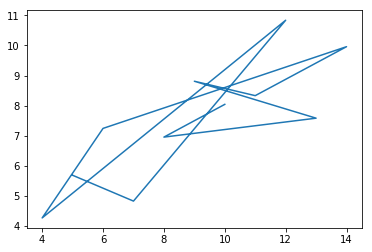

In [2]:
import matplotlib.pyplot as plt

# create a subset of the data
# contains only data set 1 from anscombe

dataset_1 = anscombe[anscombe['dataset'] == 'I']
plt.plot(dataset_1['x'], dataset_1['y'])


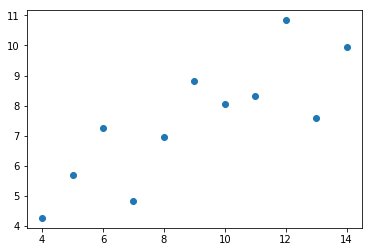

In [3]:
plt.plot(dataset_1['x'], dataset_1['y'], 'o')

In [4]:
# Create subsets of the anscombe data

dataset_2 = anscombe[anscombe['dataset'] == 'II']
dataset_3 = anscombe[anscombe['dataset'] == 'III']
dataset_4 = anscombe[anscombe['dataset'] == 'IV']

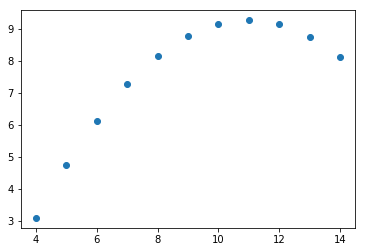

In [5]:
plt.plot(dataset_2['x'], dataset_2['y'], 'o')

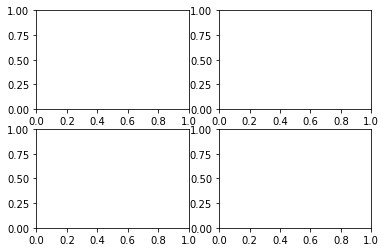

In [6]:
# Create the entire figure where the subplots will go
fig = plt.figure()

# Tell the figure how subplots should be laid out 
axes1 = fig.add_subplot(2, 2, 1)

# Subplot has 2rows and 2columns, plot location2
axes2 = fig.add_subplot(2, 2, 2)

# Subplot has 2rows and 2columns, plot location3
axes3 = fig.add_subplot(2, 2, 3)

# Subplot has 2rows and 2columns, plot location4
axes4 = fig.add_subplot(2, 2, 4)

In [7]:
# add a plot to each of the axes created above

axes1.plot(dataset_1['x'], dataset_1['y'], 'o')
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')

In [8]:
# add a small title to each subplot

axes1.set_title("dataset_1")
axes2.set_title("dataset_2")
axes3.set_title("dataset_3")
axes4.set_title("dataset_4")

Text(0.5, 1.0, 'dataset_4')

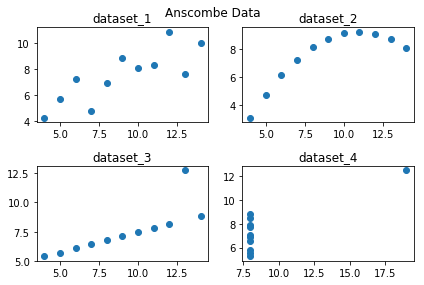

In [9]:
# add a title for the eintre figure
fig.suptitle("Anscombe Data")

# use a tight layout
fig.tight_layout()

fig


## Univeriate - Histogram

In [10]:
tips = sns.load_dataset("tips")
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


Text(0, 0.5, 'Total Bill')

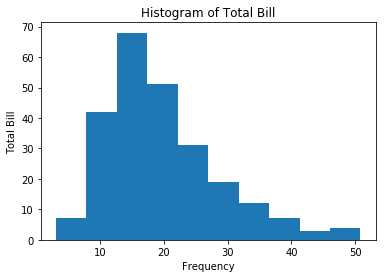

In [11]:
fig = plt.figure()
axes1 = fig.add_subplot(1, 1, 1)
axes1.hist(tips['total_bill'], bins=10)
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Total Bill')


## Bivariate - Scatterplot

Text(0, 0.5, 'Tip')

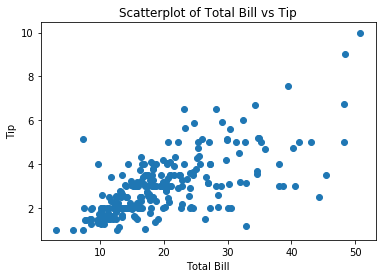

In [12]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1, 1, 1)
axes1.scatter(tips['total_bill'], tips['tip'])
axes1.set_title('Scatterplot of Total Bill vs Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

Text(0.5, 1.0, 'Boxplot of Tips by Sex')

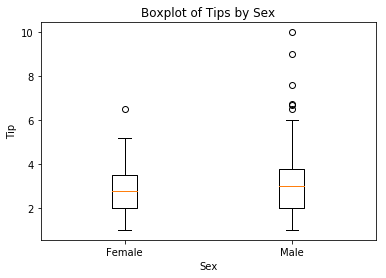

In [13]:
# boxplots are used when a discrete variable is plotted against a continuous variable

boxplot = plt.figure()
axes1 = boxplot.add_subplot(1, 1, 1)
axes1.boxplot(
    # first argument of boxplot is the data
    # since we are plottingn multiple pieces of data
    # We have to put each piece of data into a list
    [tips[tips['sex'] == 'Female']['tip'],
     tips[tips['sex'] == 'Male'] ['tip']],
    # We can then pass in an optioonal labels parameter to label the data we passed
    labels = ['Female', 'Male'])
axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot of Tips by Sex')


## Multivariate Data

Text(0, 0.5, 'Tip')

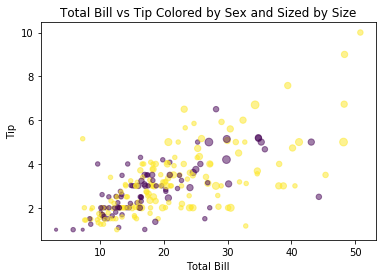

In [14]:
# create a color variable based on sex
def recode_sex(sex):
    if sex == 'Female':
        return 0
    else:
        return 1
tips['sex_color'] = tips['sex'].apply(recode_sex)

scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1, 1, 1)
axes1.scatter(
    x = tips['total_bill'],
    y = tips ['tip'],
    
    # set the size of the dots based on party size
    # we multiply the values by 10 to make the points bigger and to emphasize the differences
    s = tips['size'] * 10, 
    
    # set the color for the sex
    c = tips['sex_color'],
    
    #set the alpha value so points are more transparent and it helps with overlappint points
    alpha = 0.5)

axes1.set_title('Total Bill vs Tip Colored by Sex and Sized by Size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')


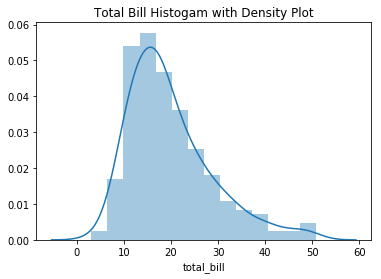

In [15]:
import seaborn as sns
tips = sns.load_dataset('tips')

# this subplots function is a shortcut for creating separate figure objects and 
# adding individual subplots(axes) to figure
hist, ax = plt.subplots()

# Use the distplot function from seaborn to create our plot
ax = sns.distplot(tips['total_bill'])
ax.set_title('Total Bill Histogam with Density Plot')

plt.show() # it still needs matplotlib.pyplot to show the figure

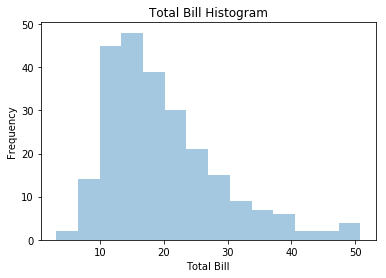

In [16]:
hist, ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], kde = False)
ax.set_title('Total Bill Histogram')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')
plt.show()


## Density Plot (Kernel Density Estimation)


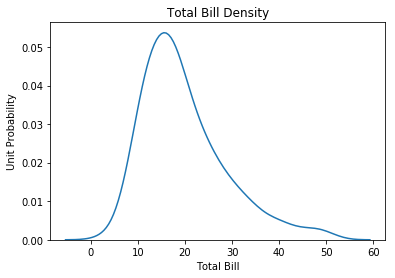

In [17]:
den, ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], hist=False)
ax.set_title('Total Bill Density')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Unit Probability')
plt.show()


## Rug Plot

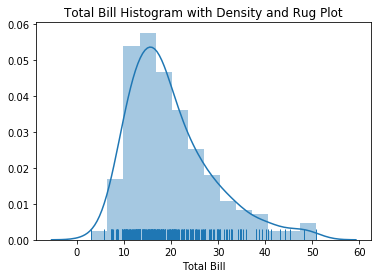

In [18]:
# Rug plots are a one-dimensional representation of a variable's

hist_den_rug, ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], rug= True)
ax.set_title('Total Bill Histogram with Density and Rug Plot')
ax.set_xlabel('Total Bill')
plt.show()



## Count Plot(Bar Plot)

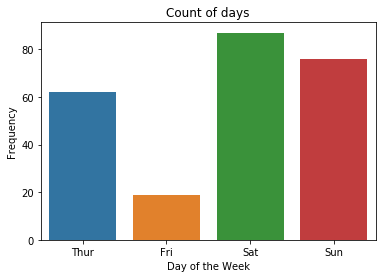

In [19]:
# Bar plots are bery similar with histograms but instead of binning values to produce a distribution,
# bar plots can be count discrete variables. 

count, ax = plt.subplots()
ax = sns.countplot('day', data = tips)
ax.set_title('Count of days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')
plt.show()


# Bivariate Data with Seaborn

### * regplot

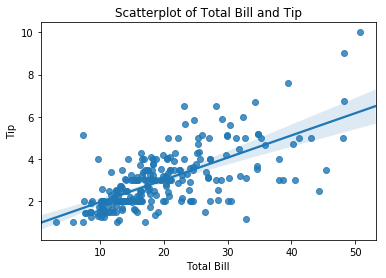

In [20]:
# regplot is a function of scatter plot for seaborn

scatter, ax = plt.subplots()
ax = sns.regplot(x = 'total_bill', y = 'tip', data = tips)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')
plt.show()


### * Implot

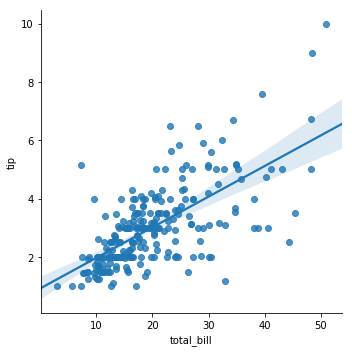

In [21]:
# a similar function, lmplot, can also create scatterplots.
# internally, import calls regplot
# the main difference is that regplot creates axes whereas lmplot creats a figure

fig = sns.lmplot(x = 'total_bill', y = 'tip', data = tips)
plt.show()

### * Jointplot

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

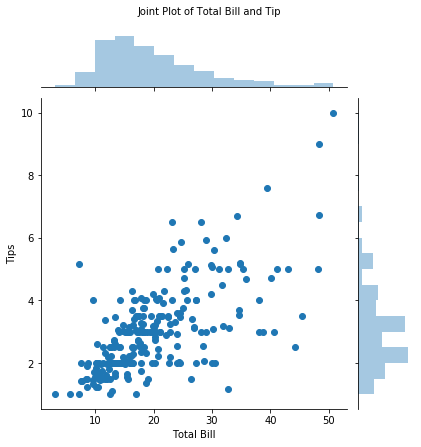

In [22]:
# jointplot doesn't return axes, so we don't need to creae a figure with axes. Instead, this function creates 
# a JointGrid object.

joint = sns.jointplot(x = 'total_bill', y = 'tip', data = tips)
joint.set_axis_labels(xlabel = 'Total Bill', ylabel = 'Tips')
# add a title, set fontsize and move the text above the total bill axes
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize = 10, y = 1.03)

### * Hexbin Plot

Text(0.5, 1.03, 'Hexbin Joint Plot of Total Bill and Trip')

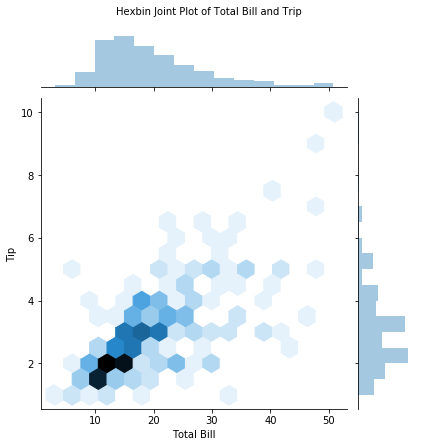

In [23]:
# Hexbin plot can bin two barialbes. It is the most efficient shape to cover an arbitrary 2D surface.

hexbin = sns.jointplot(x = 'total_bill',  y = 'tip', data = tips, kind = 'hex')
hexbin.set_axis_labels(xlabel = 'Total Bill', ylabel = 'Tip')
hexbin.fig.suptitle('Hexbin Joint Plot of Total Bill and Trip',
                   fontsize = 10, y = 1.03)


### *2D Density Plot


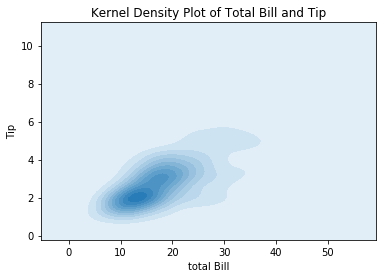

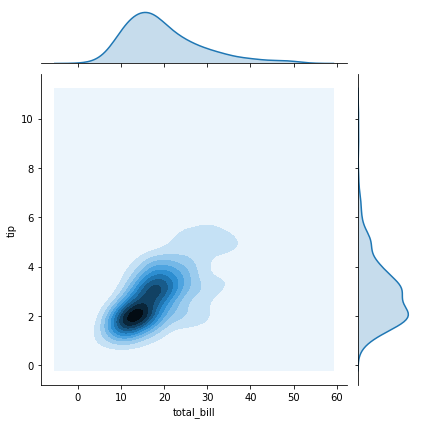

In [24]:
kde, ax = plt.subplots()
ax = sns.kdeplot(data = tips['total_bill'],
                 data2 = tips['tip'],
                 shade = True) # Shade will fill in the contours
ax.set_title('Kernel Density Plot of Total Bill and Tip')
ax.set_xlabel('total Bill')
ax.set_ylabel('Tip')
plt.show()

kde_joint = sns.jointplot(x = 'total_bill', y ='tip', data = tips, kind = 'kde')
                

### *Bar Plot

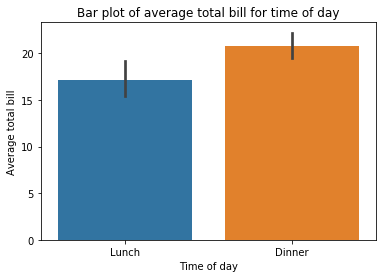

In [25]:
# Bar plots can be used to show multiple variables. By default, barplot will calculate a mean.

bar, ax = plt.subplots()
ax = sns.barplot(x = 'time', y = 'total_bill', data = tips)
ax.set_title('Bar plot of average total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Average total bill')
plt.show()


### *Boxplot

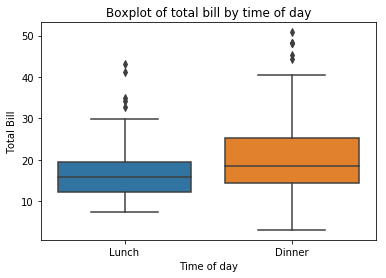

In [26]:
# boxplot shows multiple statistics: min, max, first quartile, median and so on

box, ax = plt.subplots()
ax = sns.boxplot(x = 'time', y = 'total_bill', data = tips)
ax.set_title('Boxplot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')
plt.show()


### *Violin Plot

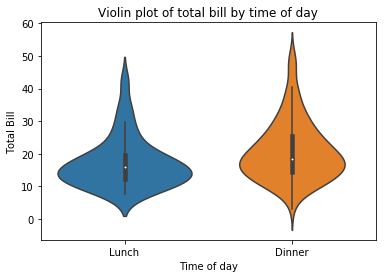

In [27]:
# Viloin plots are able to show same values as boxplots but plot the 'boxes' as kernel density estimation.

viloin, ax = plt.subplots()
ax = sns.violinplot(x = 'time', y = 'total_bill', data = tips)
ax.set_title('Violin plot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')
plt.show()


### * Pairplot (Pairwise Relationships)

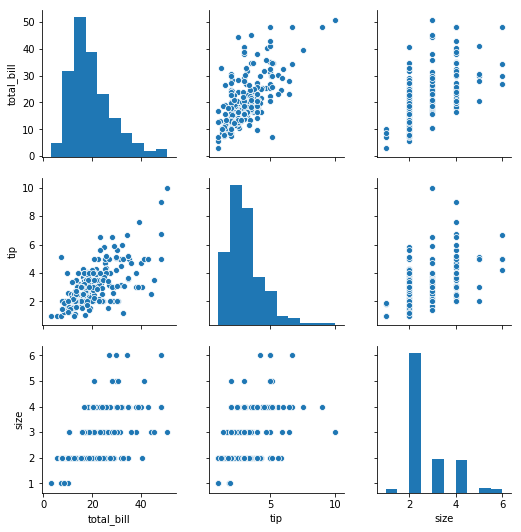

In [28]:
fig = sns.pairplot(tips)

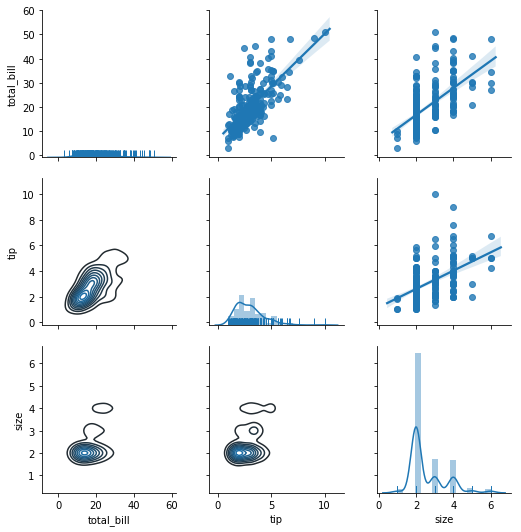

In [29]:
pair_grid = sns.PairGrid(tips)
# we can use plt.scatter instead of sns.regplot
pair_grid = pair_grid.map_upper(sns.regplot)
pair_grid = pair_grid.map_lower(sns.kdeplot)
pair_grid = pair_grid.map_diag(sns.distplot, rug = True)
plt.show()

### * Coloring for Multivariate Data

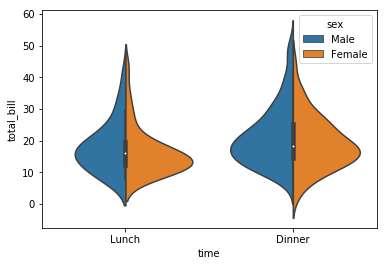

In [30]:
# De Facto there is no template for plotting multivariate data. 
# Possile ways to include more infomtion are to use color, size and shape.

violin, ax = plt.subplots()
ax = sns.violinplot(x = 'time', y = 'total_bill', hue = 'sex', data = tips, split = True)
plt.show()

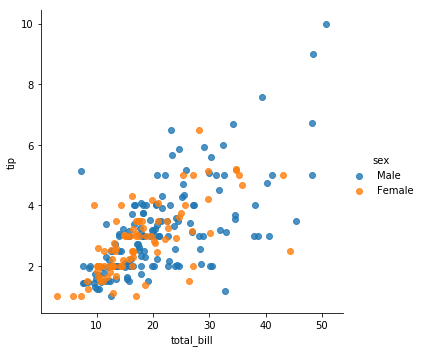

In [31]:
# Implot is used instead of regplot

scatter = sns.lmplot(x = 'total_bill', y ='tip', data = tips, hue = 'sex', fit_reg = False)
plt.show()


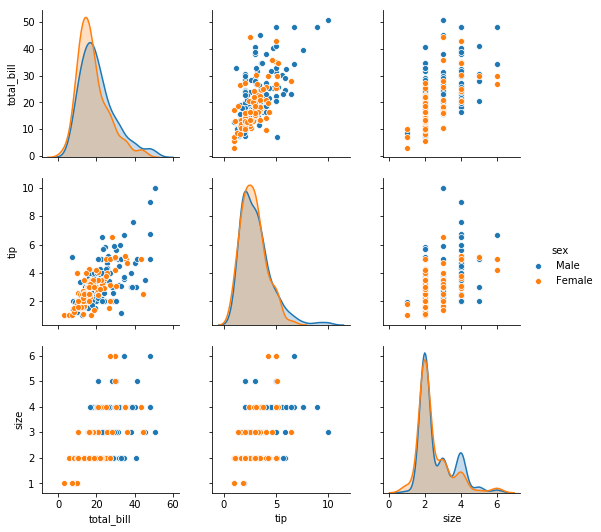

In [32]:
fig = sns.pairplot(tips, hue = 'sex')

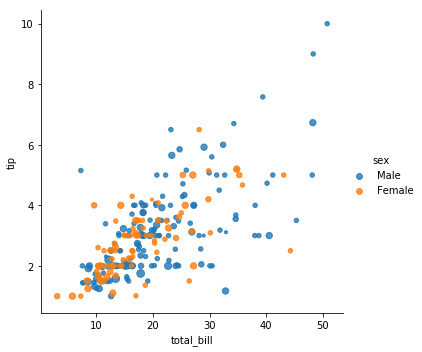

In [33]:
scatter = sns.lmplot(x = 'total_bill', y = 'tip', data = tips, fit_reg = False, hue = 'sex', 
                     scatter_kws ={'s': tips['size']*10})
plt.show()

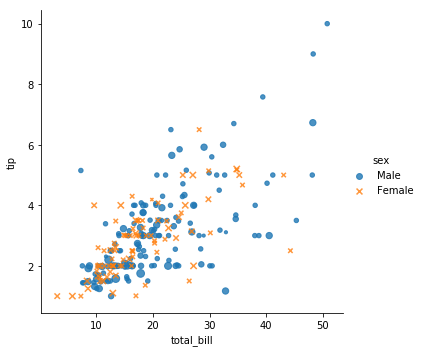

In [34]:
scatter = sns.lmplot(x = 'total_bill', y = 'tip', data = tips,
                     fit_reg = False, hue = 'sex', markers = ['o', 'x'], 
                     scatter_kws = {'s':tips['size']* 10})
plt.show()

### *Facets

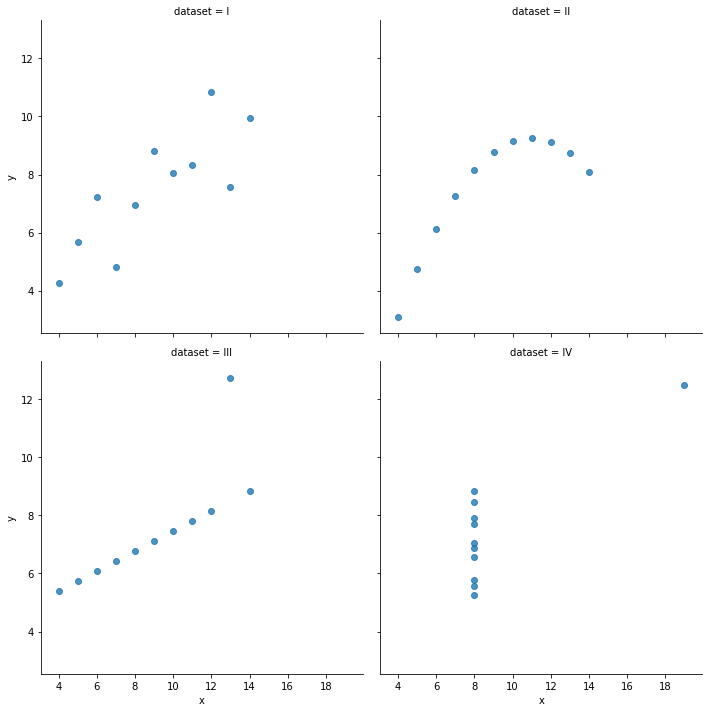

In [35]:
anscombe_plot = sns.lmplot(x ='x', y ='y', data = anscombe, fit_reg = False, col = 'dataset', col_wrap =2)

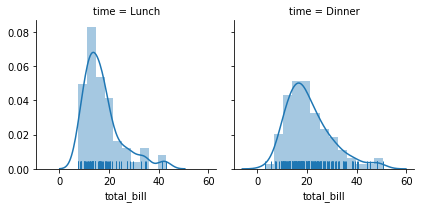

In [36]:
# Create the FacetGrid
facet = sns.FacetGrid(tips, col = 'time')
# for each value in time, plot a hisogram of total bill
facet.map(sns.distplot, 'total_bill', rug = True)
plt.show()


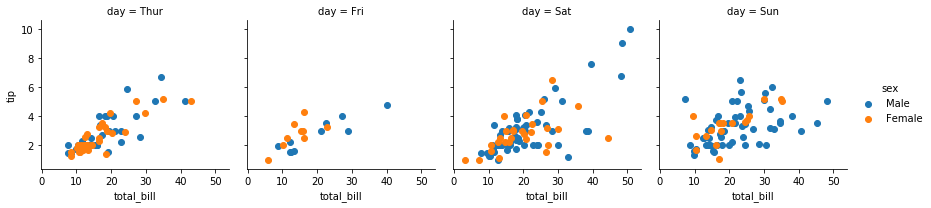

In [37]:
facet = sns.FacetGrid(tips, col = 'day', hue = 'sex')
facet = facet.map(plt.scatter, 'total_bill', 'tip')
facet = facet.add_legend()
plt.show()

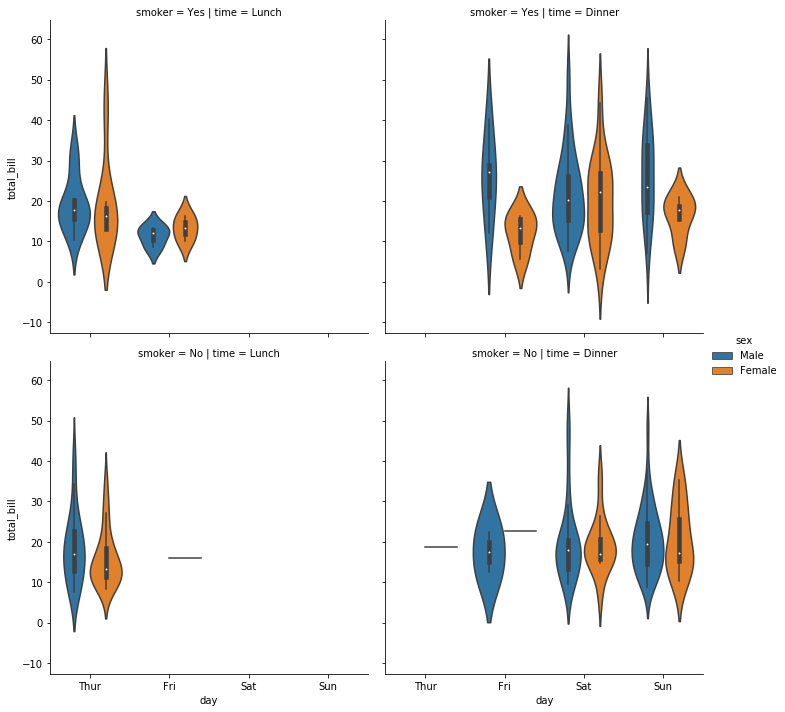

In [38]:
# renamed to catplot from factorplot

facet = sns.catplot(x = 'day', y = 'total_bill', hue = 'sex', data = tips, 
                       row = 'smoker', col = 'time', kind = 'violin')

## Pandas Object

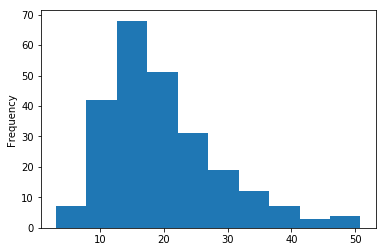

In [39]:
# On a series
fig, ax = plt.subplots()
ax = tips['total_bill'].plot.hist()
plt.show()



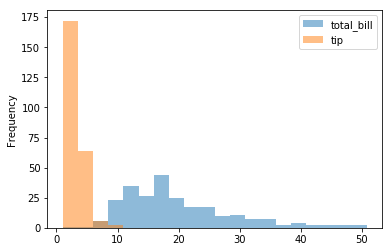

In [40]:
# On a dataframe
# set an alpha channel transparency
# so we can se though the overlapping bars
fig, ax = plt.subplots()
ax = tips[['total_bill', 'tip']].plot.hist(alpha = 0.5, bins = 20, ax = ax)
plt.show()

### * Density plot

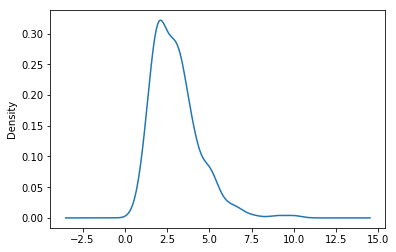

In [45]:
# The kernel density estimation plot can be created with DataFrame.plot.kde function.

fig, ax = plt.subplots()
ax = tips['tip'].plot.kde()
plt.show()


### *Scatterplot

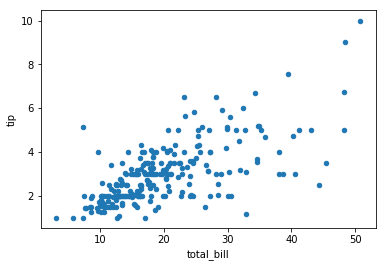

In [46]:
# Scatterplots are created by using the DataFrame.plot.scatter function

fig, ax = plt.subplots()
ax = tips.plot.scatter(x = 'total_bill', y = 'tip', ax = ax)
plt.show()

### *Hexbin Plot

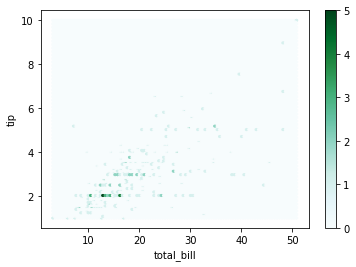

In [48]:
# Hexbin plots are created using DataFrame.plt.hexbin.

fig, ax = plt.subplots()
ax = tips.plot.hexbin(x = 'total_bill', y = 'tip', ax =ax)
plt.show()

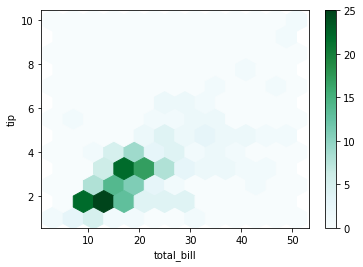

In [54]:
fig, ax = plt.subplots()
ax = tips.plot.hexbin(x = 'total_bill', y = 'tip', gridsize = 12, ax = ax)
plt.show()

### *Boxplot


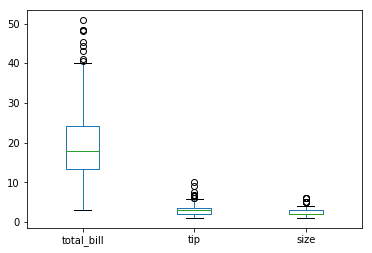

In [56]:
# Boxplots are created with Dataframe.plot.box

fig, ax = plt.subplots()
ax = tips.plot.box(ax = ax)
plt.show()


## Seaborn Themes and Styles

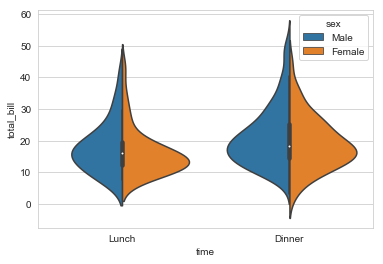

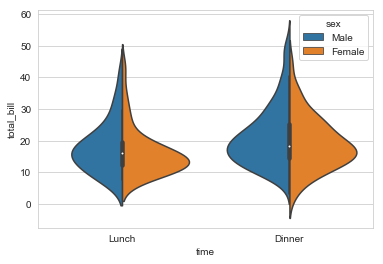

In [59]:
# sns.set_style function can change the plot style.

# initial plot for comparison
fig, ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)
plt.show()

# set styple and plot
sns.set_style('whitegrid')
fig, ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)
plt.show()


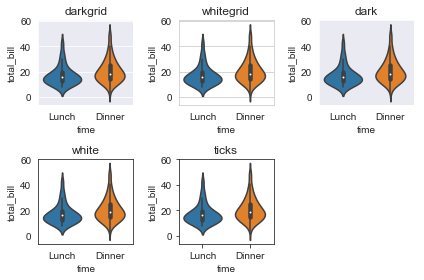

In [61]:
fig = plt.figure()
seaborn_styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']
for idx, style in enumerate(seaborn_styles):
    plot_position = idx + 1
    with sns.axes_style(style):
        ax = fig.add_subplot(2, 3, plot_position)
        violin = sns.violinplot(x='time', y='total_bill', data=tips, ax=ax )
        violin.set_title(style)
fig.tight_layout()
plt.show()
